In [20]:
# импорт модулей
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab4')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [22]:
# загрузка датасета
from keras.datasets import imdb

vocabulary_size = 5000
index_from = 3

(X_train, y_train), (X_test, y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=vocabulary_size,
    skip_top=0,
    maxlen=None,
    seed=11,
    start_char=1,
    oov_char=2,
    index_from=index_from
    )

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


In [23]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

In [24]:
print(X_train[26])
print('len:',len(X_train[26]))

[1, 2489, 723, 2, 9, 399, 2301, 11, 551, 2, 29, 47, 1391, 6, 1692, 15, 29, 70, 361, 8, 97, 35, 3258, 40, 6, 2, 106, 42, 2, 4298, 64, 8, 28, 15, 3258, 796, 2, 11, 6, 275, 1622, 21, 50, 26, 148, 33, 27, 2301, 2, 15, 81, 24, 40, 42, 2, 7, 27, 4646, 5, 80, 81, 845, 12, 304, 8, 67, 15, 29, 152, 3115, 103, 6, 1196, 2, 15, 238, 28, 1894, 27, 2, 2489, 2, 1068, 8, 2181, 27, 1692, 23, 309, 17, 873, 183, 140, 2357, 355, 5, 29, 9, 2, 83, 6, 2699, 1765, 2, 625, 2691, 1229, 80, 516, 10, 10, 11, 2, 279, 12, 286, 141, 6, 52, 326, 8, 796, 106, 4, 2, 132, 11, 4, 172, 1269, 13, 296, 4, 2223, 994, 7, 4, 2223, 5, 3176, 7, 4, 2223, 50, 186, 8, 30, 64, 38, 111, 102, 44, 551, 2, 5, 4, 4616, 3388, 302, 12, 70, 28, 23, 4, 406, 648, 15, 31, 415, 144, 30, 93, 8, 4325, 11, 6, 289, 42, 689, 251, 810, 146, 24, 252, 51, 148, 1893, 18, 4, 20, 1029, 17, 68, 2436, 819, 18, 4, 2, 132, 21, 76, 7, 12, 9, 38, 729, 8, 4, 2223, 102, 15, 12, 566, 30, 2691, 2, 190, 4, 2, 132, 218, 60, 754, 17, 52, 17, 4, 249, 7, 4, 2223, 2355, 

In [25]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<START> professor paul <UNK> is doing research in matter <UNK> he has developed a machine that he can use to make an object like a <UNK> watch or <UNK> disappear only to have that object re <UNK> in a different location but there are those at his research <UNK> that do not like or <UNK> of his experiments and will do whatever it takes to see that he doesn't succeed after a failed <UNK> that might have saved his <UNK> professor <UNK> decides to test his machine on himself as expected things go horribly wrong and he is <UNK> into a heavily scared <UNK> whose mere touch will kill br br in <UNK> maybe it wasn't such a good idea to re watch the <UNK> man in the same week i watched the fly return of the fly and curse of the fly there seems to be only so many movies about matter <UNK> and the potentially horrendous effects it can have on the human body that one person should be made to endure in a three or four day period i'm not sure what those responsible for the movie list as their source 

In [26]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))


MAX Len:  2494
MIN Len:  11


In [27]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

In [28]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  500
MIN Len:  500


In [29]:
print(X_train[26])
print('len:',len(X_train[26]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1 2489  723    2    9  399 2301   11  551    2   29
   47 1391    6 1692   15   29   70  361    8   97   35 3258   40    6
    2  106   42    2 4298   64    8   28   15 3258  796    2   11    6
  275 1622   21   50   26  148   33   27 2301    2   15   81   24   40
   42    2    7   27 4646    5   80   81  845   12  304    8   67   15
   29  152 3115  103    6 1196    2   15  238   28 1894   27    2 2489
    2 1068    8 2181   27 1692   23  309   17  873  183  140 2357  355
    5   29    9    2   83    6 2699 1765    2  625 2691 1229   80  516
   10 

In [30]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> professor paul <UNK> is doing research in matter <UNK> he has developed a machine that he can use to make an object like a <UNK> watch or <UNK> disappear only to have that object re <UNK> in a different location but there are those at his research <UNK> that do not like or <UNK> of his experiments and will do whatever it takes to see that he doesn't succeed after a failed <UNK> that might have saved his <UNK> professor <UNK> decides to test his machine on himself as

In [31]:
# вывод данных
print('X train: \n',X_train)
print('X train: \n',X_test)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of X test:', X_test.shape)

X train: 
 [[   0    0    0 ...    6    2    2]
 [   0    0    0 ...   10   10    2]
 [   1   14   22 ...  171  153  303]
 ...
 [   0    0    0 ...   17 2199 1262]
 [   0    0    0 ...  606    5 1356]
 [   0    0    0 ... 1026    5  804]]
X train: 
 [[   0    0    0 ...   10   10    2]
 [   0    0    0 ...   43 1044  710]
 [   0    0    0 ...   35  744   23]
 ...
 [   0    0    0 ...  184 1543  616]
 [   0    0    0 ...   38    2   78]
 [   0    0    0 ...    5    2    2]]
Shape of X train: (25000, 500)
Shape of X test: (25000, 500)


In [32]:
embed_dim = 32
lstm_units = 64

model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=embed_dim, input_length=max_words, input_shape=(max_words,)))
model.add(layers.LSTM(lstm_units))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# компилируем и обучаем модель
batch_size = 64
epochs = 3
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6482 - loss: 0.6264 - val_accuracy: 0.8446 - val_loss: 0.3654
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8459 - loss: 0.3677 - val_accuracy: 0.7632 - val_loss: 0.4948
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8515 - loss: 0.3613 - val_accuracy: 0.8700 - val_loss: 0.3384


In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8629 - loss: 0.3494

Test accuracy: 0.8626800179481506


In [35]:
#значение метрики качества классификации на тестовых данных
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.8626800179481506


In [36]:
#отчет о качестве классификации тестовой выборки
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86     12500
    Positive       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



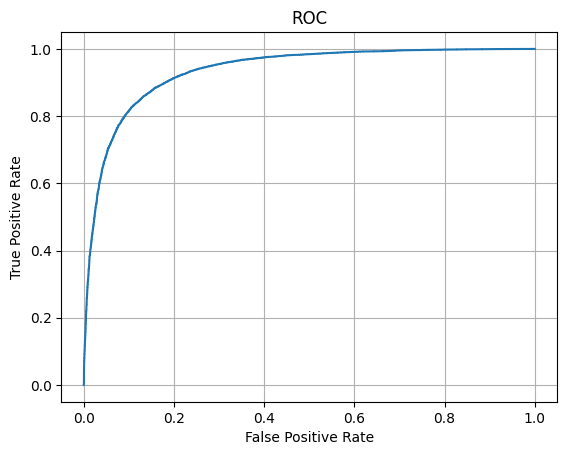

AUC ROC: 0.9349818848


In [37]:
#построение ROC-кривой и AUC ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('AUC ROC:', auc(fpr, tpr))